# TIME SERIES ANALYSIS AND FORECASTING ON ELECTRIC PRODUCTION

### Why do we study Time Series?
- We study time series to understad the relationship between past, present and future values of market values be it stock prices, sales of a company
  or any value that has a relationship with business. The study helps us to understand the price behaviour and how we should expect the future pricing
  to act in similar or same conditions. It is not always certain that the predicted values will be identical but with the predictions, other preparations 
  can be made business wise to prepare one on measures to take should if the predicted value is poor and also same goes with a good predicted value.
  Most businesses needs this aspect of machine learning in order to prepare for the unseen factors that might shift the prices in a good or bad way.

### The reason for this Analysis
- This is a dataset gotten from the Federal Reserve Econimic Data, this combined data helps us understand, interact , display and disseminate data in it.
  It is a data story of Electric Production over the years for a particular country. This data measures the real output of all relevant establishments located
  in that said country, regardless of their ownership. Hence we can use thie data to forecast the iutput for the coming periods using Time Series.

#### Loading CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Elect_df = pd.read_csv('C:/Users/personal/Documents/datasets/TIME SERIES/archive/Electric_Production.csv', header=0 , parse_dates=[0])

In [3]:
Elect_df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [4]:
Elect_df.tail()

,DATE,IPG2211A2N
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


- Renaming the IPG2211A2N for easy analysis.

In [5]:
Elect_df.rename({'IPG2211A2N' : 'value'}, axis=1, inplace=True)

#### Indexing the Date column

In [6]:
Elect_df.index = Elect_df['DATE']

In [7]:
Elect_df.head()

,DATE,value
DATE,,
1985-01-01,1985-01-01,72.5052
1985-02-01,1985-02-01,70.6720
1985-03-01,1985-03-01,62.4502
1985-04-01,1985-04-01,57.4714
1985-05-01,1985-05-01,55.3151


<AxesSubplot:xlabel='DATE'>

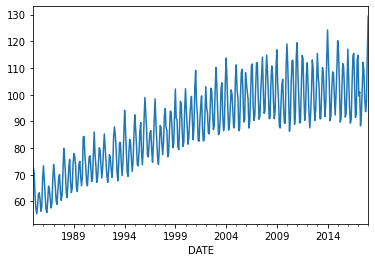

In [8]:
Elect_df['value'].plot()

### Preprocessing and Forecasting Models

In [9]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Differencing

This is the process of removing Trends and Seasonality in our data because machine learning models cannot predict on data with trends and seasonality, 
there has to be Stationarity for prediction to go on.

In [10]:
Elect_df['Lag1'] = Elect_df['value'].shift(1)

Differencing with periods = 1 takes care of the trend in the data.

In [11]:
Elect_df['value_diff'] = Elect_df['value'].diff(periods=1)

<AxesSubplot:xlabel='DATE'>

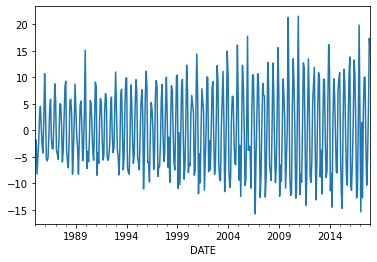

In [12]:
Elect_df['value_diff'].plot()

There are no longer traces of trends in our data using period 1.

In [13]:
Elect_df.head()

,DATE,value,Lag1,value_diff
DATE,,,,
1985-01-01,1985-01-01,72.5052,NaN,NaN
1985-02-01,1985-02-01,70.6720,72.5052,-1.8332
1985-03-01,1985-03-01,62.4502,70.6720,-8.2218
1985-04-01,1985-04-01,57.4714,62.4502,-4.9788
1985-05-01,1985-05-01,55.3151,57.4714,-2.1563


In [14]:
# to show the trend and seasonality in a graph
result_1 = seasonal_decompose(Elect_df['value'], model='additive')

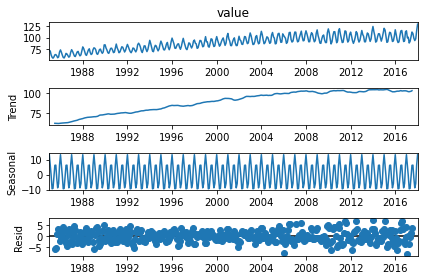

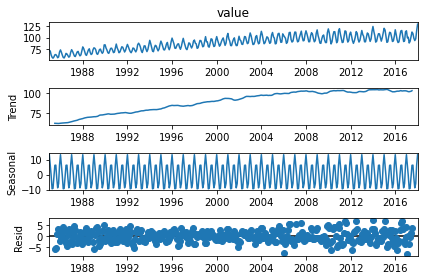

In [15]:
result_1.plot()

In [16]:
result_2 = seasonal_decompose(Elect_df.iloc[1:,3], model='additive')

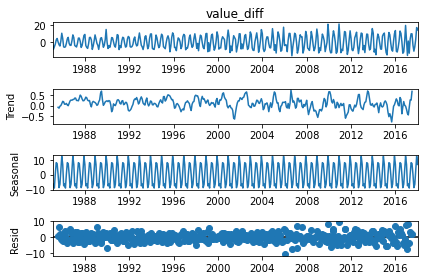

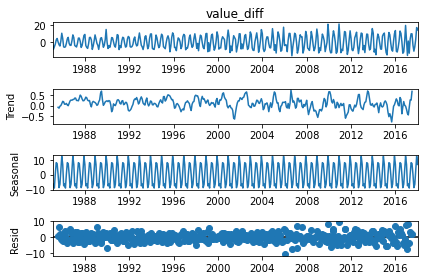

In [17]:
result_2.plot()

We can see that the trend has been taken care of from the second plot...now we work on seasonality.

In [18]:
# differencing periods of 12
Elect_df['value_diff_12'] = Elect_df['value_diff'].diff(periods=12)

<AxesSubplot:xlabel='DATE'>

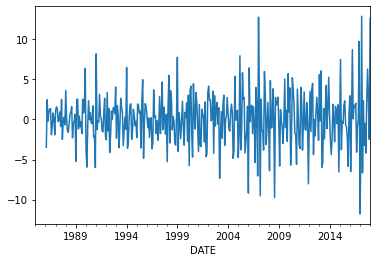

In [19]:
Elect_df['value_diff_12'].plot()

It is very clear that any trace of seasonality has been removed using period of 12.

In [20]:
result_3 = seasonal_decompose(Elect_df.iloc[13:,4], model='additive')

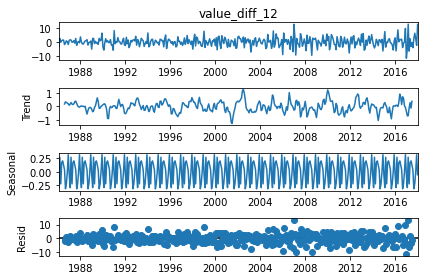

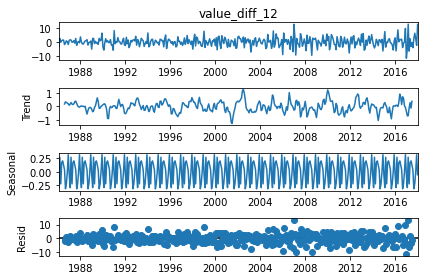

In [21]:
result_3.plot()

Seasonality taken care of...

# ARIMA model(Auto regressive Integrated Moving Average).

In [22]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

To train our model using arima we need three parameters; p,d,q which stands for the Order of Auto Regression lag variables, Order of Integration(differencing needed) and Order of Moving Average(window size of residuals) respectively...

<AxesSubplot:xlabel='DATE'>

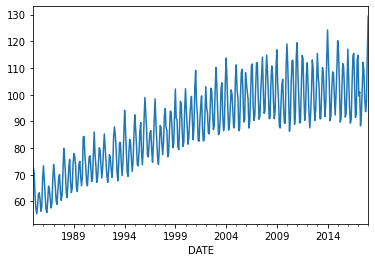

In [23]:
Elect_df['value'].plot()

From the above, the trend is linear so d is linear therefore, d = 1.

### Autocorrelation plot

This plot is done to determine the order of AR.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

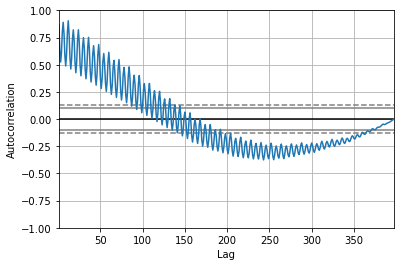

In [24]:
autocorrelation_plot(Elect_df['value'])

From looking at our plot, in the state it is in we can see that the cross on the confidence line was done first on the 80 mark. Therefore, p = 80.

### Partial Autocorrelation plot

This plot is done to determine the order of MA.

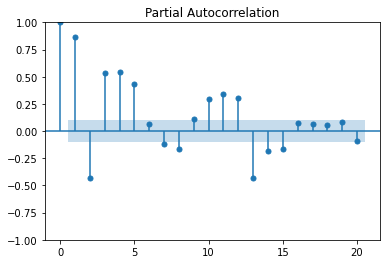

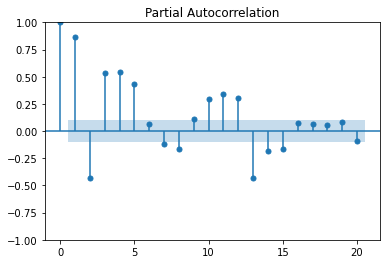

In [25]:
plot_pacf(Elect_df['value'], lags=20)

We can see that the cross on our confidence level was somewhere on 2, so we would pick q = 1.

In [26]:
### Training the model.
model_arima = ARIMA(Elect_df['value'], order = (80,1,1))

In [27]:
model_arima_fit = model_arima.fit()

In [28]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  397
Model:                ARIMA(80, 1, 1)   Log Likelihood                -874.755
Date:                Fri, 19 Aug 2022   AIC                           1913.509
Time:                        03:19:41   BIC                           2239.985
Sample:                    01-01-1985   HQIC                          2042.849
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0944      0.761     -0.124      0.901      -1.586       1.397
ar.L2         -0.3551      0.318     -1.116      0.264      -0.979       0.269
ar.L3         -0.1983      0.369     -0.537      0.591      -0.922       0.526
ar.L4         -0.2155      0.282     -0.764      0.445      -0.769       0.338
ar.L5         -0.2648      0.256     -1.035      0.301      -0.766       0.237
ar.L6         -0.1513      0.287     -0.527      0.598      -0.714       0.412
ar.L7         -0.1991      0.232     -0.859      0.390      -0.653       0.255
ar.L8         -0.2691      0.238     -1.128      0.259      -0.737       0.198
ar.L9         -0.2393      0.305     -0.785      0.432      -0.836       0.358
ar.L10        -0.1026      0.290     -0.354      0.723      -0.671       0.466
ar.L11        -0.1392      0.184     -0.756      0.450      -0.500       0.222
ar.L12         0.1384      0.177      0.782      0.434      -0.209       0.485
ar.L13        -0.1574      0.098     -1.614      0.107      -0.349       0.034
ar.L14         0.0065      0.144      0.045      0.964      -0.275       0.288
ar.L15        -0.1492      0.097     -1.543      0.123      -0.339       0.040
ar.L16        -0.0688      0.165     -0.416      0.677      -0.393       0.255
ar.L17        -0.0323      0.133     -0.243      0.808      -0.293       0.228
ar.L18        -0.0233      0.112     -0.208      0.835      -0.242       0.196
ar.L19         0.0163      0.099      0.165      0.869      -0.177       0.210
ar.L20         0.0274      0.091      0.302      0.763      -0.150       0.205
ar.L21        -0.0666      0.103     -0.650      0.516      -0.268       0.134
ar.L22        -0.0309      0.103     -0.299      0.765      -0.233       0.171
ar.L23         0.0076      0.099      0.076      0.939      -0.187       0.202
ar.L24        -0.0578      0.089     -0.651      0.515      -0.232       0.116
ar.L25        -0.0652      0.105     -0.619      0.536      -0.272       0.141
ar.L26        -0.0632      0.118     -0.538      0.591      -0.294       0.167
ar.L27        -0.0972      0.125     -0.776      0.438      -0.343       0.148
ar.L28         0.0589      0.137      0.429      0.668      -0.210       0.328
ar.L29        -0.0845      0.081     -1.039      0.299      -0.244       0.075
ar.L30         0.0626      0.113      0.553      0.580      -0.159       0.284
ar.L31         0.1172      0.091      1.290      0.197      -0.061       0.295
ar.L32         0.0052      0.119      0.044      0.965      -0.228       0.238
ar.L33         0.1308      0.095      1.384      0.166      -0.054       0.316
ar.L34         0.0744      0.130      0.573      0.567      -0.180       0.329
ar.L35         0.0693      0.124      0.560      0.576      -0.173       0.312
ar.L36         0.2944      0.119      2.473      0.013       0.061       0.528
ar.L37         0.0980      0.264      0.371      0.711      -0.420       0.616
ar.L38         0.1340      0.173      0.775      0.438      -0.205       0.473
ar

In [29]:
residuals = model_arima_fit.resid

<AxesSubplot:xlabel='DATE'>

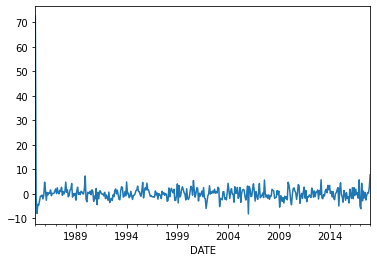

In [30]:
residuals.plot()

As we can see, the residuals should be in form of white noise, there should be no visible pattern in the residual plot as the residual plots show errors
which should be in form of white noise filtered out from the important informations held in the trained model.

In [31]:
model_arima_fit.forecast(5)

2018-02-01    115.320498
2018-03-01    105.598930
2018-04-01     93.016273
2018-05-01     95.984376
2018-06-01    102.805201
Freq: MS, Name: predicted_mean, dtype: float64

# Training using Persistence(Naive forecast model),Auto Regression(AR) and Moving Averages(MA) Separately.

- First we import the dataset again for proper splitting into test and train sets.

In [32]:
Elect_ARMA = pd.read_csv('C:/Users/personal/Documents/datasets/TIME SERIES/archive/Electric_Production.csv', header=0 , parse_dates=[0])

In [33]:
# rename the column again
Elect_ARMA.rename({'IPG2211A2N' : 'value'}, axis=1, inplace=True)

In [34]:
Elect_ARMA.index = Elect_ARMA['DATE']

## Naive Forecast model

In [35]:
Elect_ARMA['Lag'] = Elect_ARMA['value'].shift(1)

In [36]:
Elect_ARMA.head()

,DATE,value,Lag
DATE,,,
1985-01-01,1985-01-01,72.5052,NaN
1985-02-01,1985-02-01,70.6720,72.5052
1985-03-01,1985-03-01,62.4502,70.6720
1985-04-01,1985-04-01,57.4714,62.4502
1985-05-01,1985-05-01,55.3151,57.4714


In [37]:
Elect_ARMA.shape

(397, 3)

In [38]:
#train = Elect_ARMA[0:train_size]...HINT

In [39]:
train, test = Elect_ARMA[1:Elect_ARMA.shape[0] - 80], Elect_ARMA[Elect_ARMA.shape[0] - 80 :]

In [40]:
train.head()

,DATE,value,Lag
DATE,,,
1985-02-01,1985-02-01,70.6720,72.5052
1985-03-01,1985-03-01,62.4502,70.6720
1985-04-01,1985-04-01,57.4714,62.4502
1985-05-01,1985-05-01,55.3151,57.4714
1985-06-01,1985-06-01,58.0904,55.3151


In [41]:
test.head()

,DATE,value,Lag
DATE,,,
2011-06-01,2011-06-01,102.8204,90.0698
2011-07-01,2011-07-01,114.7068,102.8204
2011-08-01,2011-08-01,113.5958,114.7068
2011-09-01,2011-09-01,99.4712,113.5958
2011-10-01,2011-10-01,90.3566,99.4712


In [42]:
train_X , train_y = train['Lag'], train['value']
test_X, test_y = test['Lag'],test['value']

- Walk forward

In [43]:
pred_1 = test_X.copy()

In Naive forecast it is believed that the forecast is the immediate value next to the actual value that is why we use the shift of our values as the 
predicted forecast.

In [44]:
pred_1
test_y

DATE
2011-06-01    102.8204
2011-07-01    114.7068
2011-08-01    113.5958
2011-09-01     99.4712
2011-10-01     90.3566
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: value, Length: 80, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mse_1 = mean_squared_error(test_y, pred_1)
mse_1

90.36039228

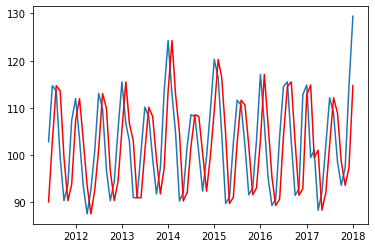

In [47]:
plt.plot(test_y)
plt.plot(pred_1, color = 'red')

We can see the relationship between our test and predicted values..

## Auto Regression model

In [48]:
from statsmodels.tsa.ar_model import AutoReg as AR

In [49]:
train, test = Elect_ARMA.value[1:Elect_ARMA.shape[0] - 80], Elect_ARMA.value[Elect_ARMA.shape[0] - 80 :]

In [50]:
model_AR = AR(train, lags=22)

In [51]:
model_fit = model_AR.fit()

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                  316
Model:                    AutoReg(22)   Log Likelihood                -671.300
Method:               Conditional MLE   S.D. of innovations              2.374
Date:                Fri, 19 Aug 2022   AIC                           1390.601
Time:                        03:19:49   BIC                           1479.007
Sample:                    12-01-1986   HQIC                          1426.005
                         - 05-01-2011                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0497      1.104      2.762      0.006       0.886       5.214
value.L1       0.6151      0.058     10.566      0.000       0.501       0.729
value.L2      -0.1614      0.068     -2.361      0.018      -0.295      -0.027
value.L3       0.1491      0.069      2.160      0.031       0.014       0.284
value.L4      -0.0522      0.070     -0.747      0.455      -0.189       0.085
value.L5       0.0185      0.070      0.265      0.791      -0.118       0.155
value.L6       0.0156      0.070      0.223      0.823      -0.121       0.153
value.L7       0.0346      0.070      0.496      0.620      -0.102       0.171
value.L8      -0.0867      0.069     -1.258      0.208      -0.222       0.048
value.L9       0.0355      0.069      0.514      0.607      -0.100       0.171
value.L10     -0.0400      0.067     -0.602      0.547      -0.170       0.090
value.L11      0.1080      0.056      1.916      0.055      -0.002       0.219
value.L12      0.6173      0.056     10.961      0.000       0.507       0.728
value.L13     -0.3319      0.067     -4.969      0.000      -0.463      -0.201
value.L14      0.0671      0.070      0.963      0.335      -0.069       0.204
value.L15     -0.1857      0.070     -2.670      0.008      -0.322      -0.049
value.L16      0.0613      0.070      0.871      0.384      -0.077       0.199
value.L17      0.0690      0.070      0.979      0.328      -0.069       0.207
value.L18     -0.0648      0.071     -0.916      0.359      -0.204       0.074
value.L19      0.0859      0.071      1.202      0.229      -0.054       0.226
value.L20      0.0178      0.072      0.248      0.804      -0.123       0.158
value.L21     -0.0959      0.071     -1.348      0.178      -0.235       0.044
value.L22      0.0979      0.060      1.634      0.102      -0.020       0.215
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0532           -0.0000j            1.0532           -0.5000
AR.2            -0.8890           -0.5164j            1.0281           -0.4162
AR.3            -0.8890           +0.5164j            1.0281            0.4162
AR.4            -1.1868           -0.4031j            1.2534           -0.4479
AR.5            -1.1868           +0.4031j            1.2534            0.4479
AR.6            -0.6049           -0.8782j            1.0664           -0.3460
AR.7            -0.6049           +0.8782j            1.0664            0.3460
AR.8            -0.4404           -0.9974j            1.0903           -0.3162
AR.9            -0.4404           +0.9974j            1.0903            0.3162
AR.10           -0.0110           -1.0350j            1.0350           -0.2517
AR.11           -0.0110           +1.0350j            1.0350            0.2517
AR

In [53]:
pred_AR = model_fit.predict(start = len(train), end = len(train)+len(test) - 1)

In [54]:
pred_AR

2011-06-01    104.045593
2011-07-01    114.582472
2011-08-01    113.422224
2011-09-01     99.043824
2011-10-01     89.360676
                 ...    
2017-09-01    100.444813
2017-10-01     90.738574
2017-11-01     97.388994
2017-12-01    113.828990
2018-01-01    123.491360
Freq: MS, Length: 80, dtype: float64

In [55]:
mse_AR = mean_squared_error(test_y, pred_AR)

In [56]:
mse_AR

26.25828557466526

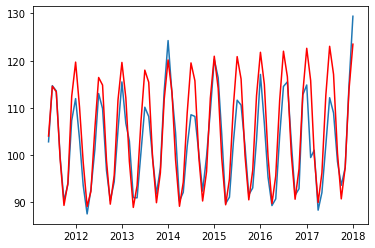

In [57]:
plt.plot(test_y)
plt.plot(pred_AR, color = 'red')

Our mean squared error reduced drastically with Auto Regression as expected and we can see our model performing better from our plot.

## Moving Average Model

Here, we run Auto regression on the **residuals** of our time series.

In [58]:
# Bringing down "value" and "lag" from our naive forecast, we will use it to build our MA.
Elect_ARMA.head()

,DATE,value,Lag
DATE,,,
1985-01-01,1985-01-01,72.5052,NaN
1985-02-01,1985-02-01,70.6720,72.5052
1985-03-01,1985-03-01,62.4502,70.6720
1985-04-01,1985-04-01,57.4714,62.4502
1985-05-01,1985-05-01,55.3151,57.4714


In [59]:
Elect_ARMA['Residual'] = Elect_ARMA['value'] - Elect_ARMA['Lag']

In [60]:
Elect_ARMA.head()

,DATE,value,Lag,Residual
DATE,,,,
1985-01-01,1985-01-01,72.5052,NaN,NaN
1985-02-01,1985-02-01,70.6720,72.5052,-1.8332
1985-03-01,1985-03-01,62.4502,70.6720,-8.2218
1985-04-01,1985-04-01,57.4714,62.4502,-4.9788
1985-05-01,1985-05-01,55.3151,57.4714,-2.1563


In [61]:
train, test = Elect_ARMA.Residual[1 : Elect_ARMA.shape[0] - 80], Elect_ARMA.Residual[Elect_ARMA.shape[0] - 80 : ]

In [62]:
MODEL_MA = AR(train, lags=22)

In [63]:
MODEL_FIT = MODEL_MA.fit()

In [64]:
MODEL_FIT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Residual   No. Observations:                  316
Model:                    AutoReg(22)   Log Likelihood                -666.596
Method:               Conditional MLE   S.D. of innovations              2.336
Date:                Fri, 19 Aug 2022   AIC                           1381.191
Time:                        03:19:50   BIC                           1469.597
Sample:                    12-01-1986   HQIC                          1416.595
                         - 05-01-2011                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8741      0.196      4.459      0.000       0.490       1.258
Residual.L1     -0.3879      0.057     -6.791      0.000      -0.500      -0.276
Residual.L2     -0.5240      0.061     -8.625      0.000      -0.643      -0.405
Residual.L3     -0.3708      0.068     -5.468      0.000      -0.504      -0.238
Residual.L4     -0.4358      0.071     -6.122      0.000      -0.575      -0.296
Residual.L5     -0.3934      0.075     -5.240      0.000      -0.541      -0.246
Residual.L6     -0.3882      0.078     -4.955      0.000      -0.542      -0.235
Residual.L7     -0.3674      0.081     -4.531      0.000      -0.526      -0.208
Residual.L8     -0.4071      0.083     -4.905      0.000      -0.570      -0.244
Residual.L9     -0.3776      0.086     -4.375      0.000      -0.547      -0.208
Residual.L10    -0.3411      0.089     -3.843      0.000      -0.515      -0.167
Residual.L11    -0.3609      0.090     -4.013      0.000      -0.537      -0.185
Residual.L12     0.2330      0.090      2.583      0.010       0.056       0.410
Residual.L13    -0.1021      0.089     -1.144      0.253      -0.277       0.073
Residual.L14    -0.0504      0.087     -0.582      0.561      -0.220       0.119
Residual.L15    -0.2240      0.083     -2.695      0.007      -0.387      -0.061
Residual.L16    -0.1694      0.081     -2.085      0.037      -0.329      -0.010
Residual.L17    -0.1079      0.079     -1.374      0.170      -0.262       0.046
Residual.L18    -0.1815      0.076     -2.395      0.017      -0.330      -0.033
Residual.L19    -0.0849      0.072     -1.187      0.235      -0.225       0.055
Residual.L20    -0.1029      0.069     -1.488      0.137      -0.238       0.033
Residual.L21    -0.1717      0.063     -2.739      0.006      -0.295      -0.049
Residual.L22    -0.2250      0.060     -3.778      0.000      -0.342      -0.108
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0616           -0.2574j            1.0924           -0.0379
AR.2             1.0616           +0.2574j            1.0924            0.0379
AR.3             0.8776           -0.5108j            1.0154           -0.0839
AR.4             0.8776           +0.5108j            1.0154            0.0839
AR.5             0.8246           -0.7679j            1.1268           -0.1193
AR.6             0.8246           +0.7679j            1.1268            0.1193
AR.7             0.4981           -0.8644j            0.9976           -0.1668
AR.8             0.4981           +0.8644j            0.9976            0.1668
AR.9             0.2474           -1.0811j            1.1090           -0.2142
AR.10            0.2474           +1.0811j            1.1090            0.2142
AR.11           -0.0115      

In [65]:
Pred_Res = MODEL_FIT.predict(start = len(train), end = len(train)+len(test) - 1)

- Here, we add the predicted residuls to the actual predicted vaues.
- Basically, MA(moving Average) = (AR on Naive Residuals) + (Naive Predictions/Lag)

In [66]:
Pred_Res

2011-06-01    13.264172
2011-07-01    10.509685
2011-08-01    -1.210558
2011-09-01   -12.910548
2011-10-01   -10.498584
                ...    
2017-09-01   -17.247397
2017-10-01   -10.083340
2017-11-01     7.506198
2017-12-01    17.337715
2018-01-01     9.562487
Freq: MS, Length: 80, dtype: float64

In [67]:
Pred_Naive = Elect_ARMA.Lag[Elect_ARMA.shape[0] - 80 : ]

In [68]:
Pred_Naive

DATE
2011-06-01     90.0698
2011-07-01    102.8204
2011-08-01    114.7068
2011-09-01    113.5958
2011-10-01     99.4712
                ...   
2017-09-01    108.9312
2017-10-01     98.6154
2017-11-01     93.6137
2017-12-01     97.3359
2018-01-01    114.7212
Name: Lag, Length: 80, dtype: float64

In [69]:
Pred_MA = Pred_Res + Pred_Res

In [70]:
Pred_MA

2011-06-01    26.528345
2011-07-01    21.019371
2011-08-01    -2.421117
2011-09-01   -25.821096
2011-10-01   -20.997167
                ...    
2017-09-01   -34.494794
2017-10-01   -20.166680
2017-11-01    15.012397
2017-12-01    34.675430
2018-01-01    19.124975
Freq: MS, Length: 80, dtype: float64

In [71]:
mse_MA = mean_squared_error(test_y, Pred_MA)

In [72]:
mse_MA

10766.87256795204

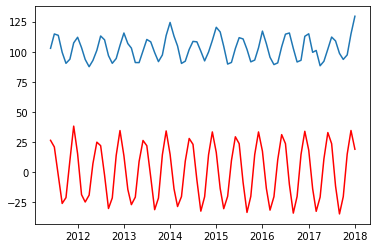

In [73]:
plt.plot(test_y)
plt.plot(Pred_MA, color = 'red')

It is obvious that the best models to use on this project is the ARIMA model, followed by the Auto regression model then the Naive model.

## Summary

- In Auto Regression, analysis was done using the Original problem value from the dataset while in Moving Average, analysis was done using the residuals
  ie the difference between the original value and the Lag.
- The Auto Regression performed better than the Naive forecast because the Naive had more noise in it due to the fact that it has trend and seasonality
  unchecked, while the AR had lesser because we use the Lag values which being devoid of Trend, produced lesser noise than the naive.
- Basically, MA(moving Average) = (AR on Naive Residuals) + (Naive Predictions/Lag).
- ARIMA model is easier to compute with the aid of software calculations.